In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, datetime, timezone
from workalendar.america import Brazil
cal = Brazil()

feriados = ['2015-01-01','2015-02-17','2015-04-03','2015-04-05','2015-04-21','2015-05-01','2015-06-04','2015-09-07',
        '2015-10-12','2015-11-02','2015-11-15','2015-12-25','2016-01-01','2016-02-09','2016-03-25','2016-03-27',
        '2016-04-21','2016-05-01','2016-05-26','2016-06-04','2016-09-07','2016-10-12','2016-11-02','2016-11-15',
        '2016-12-25','2017-01-01','2017-02-28','2017-04-14','2017-04-16','2017-04-21','2017-05-01','2017-05-26',
        '2017-06-15','2017-09-07','2017-10-12','2017-11-02','2017-11-15','2017-12-25','2018-01-01','2018-02-13',
        '2018-03-30','2018-04-01','2018-04-21','2018-05-01','2018-05-31','2018-09-07','2018-10-12','2018-11-02',
        '2018-11-15','2018-12-25','2019-01-01','2019-03-05','2019-04-19','2019-04-21','2019-05-01','2019-06-20',
        '2019-09-07','2019-10-12','2019-11-02','2019-11-15','2019-12-25']
feriados = pd.to_datetime(feriados, format='%Y-%m-%d')
feriados = pd.DataFrame({'data':feriados})

dfDiario = pd.read_csv('./trscNegocioTOTAL.csv', sep=';')
dfDiario['data'] = pd.to_datetime(dfDiario['data'], format='%d/%m/%Y')
df = pd.merge(dfDiario, feriados, how='left', on='data', indicator = True)
dfDiario['feriado'] = np.where(df['_merge'] == 'both', 1, 0)
dfDiario['dia'] = (dfDiario['data'].dt.day)
dfDiario['mes'] = (dfDiario['data'].dt.month)
dfDiario['ano'] = (dfDiario['data'].dt.year)
dfDiario['diaDoAno'] = (dfDiario['data'].dt.dayofyear)
dfDiario['diaSemana'] = (dfDiario['data'].dt.dayofweek)
dfDiario['numSemanaMes'] = ((dfDiario['data'].dt.day - 1) // 7 + 1)
dfDiario['diaUtil'] = ((dfDiario['diaSemana'] < 5) & (dfDiario.feriado == 0))
dfDiario['diaDeProducao'] = (((dfDiario.diaSemana == 1) | (dfDiario.diaSemana == 3)) & dfDiario.diaUtil == True)
dfDiario['dia5'] = 0
dfDiario['dia10'] = 0

dias = np.array(dfDiario['dia'].tolist())
meses = np.array(dfDiario['mes'].tolist())
anos = np.array(dfDiario['ano'].tolist())

for i in range(len(dfDiario)):
    if(dfDiario['data'][i] == pd.Timestamp(cal.add_working_days(date(anos[i], meses[i], 1), 5))):
        dfDiario['dia5'][i] = 1
    if(dfDiario['data'][i] == pd.Timestamp(cal.add_working_days(date(anos[i], meses[i], 1), 10))):
        dfDiario['dia10'][i] = 1

dfDiario['segDia5'] = ((dfDiario['data'].dt.dayofweek == 0) & (dfDiario['dia'] == 5) & (dfDiario.feriado == 0))
dfDiario['segDia10'] = ((dfDiario['data'].dt.dayofweek == 0) & (dfDiario['dia'] == 10) & (dfDiario.feriado == 0))
dfDiario['inicioSemana'] = (dfDiario['diaSemana'] < 3)
dfDiario['semanaAno'] = (dfDiario['data'].dt.weekofyear)
dfDiario['inicioMes'] = (dfDiario['data'].dt.is_month_start)
dfDiario['fimMes'] = (dfDiario['data'].dt.is_month_end)

dfDiario.dtypes

c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


data             datetime64[ns]
trscNegocio               int64
feriado                   int32
dia                       int64
mes                       int64
ano                       int64
diaDoAno                  int64
diaSemana                 int64
numSemanaMes              int64
diaUtil                    bool
diaDeProducao              bool
dia5                      int64
dia10                     int64
segDia5                    bool
segDia10                   bool
inicioSemana               bool
semanaAno                 int64
inicioMes                  bool
fimMes                     bool
dtype: object

In [4]:
trocar = {
        True : 1,
        False : 0
    }
dfDiario.diaUtil = dfDiario.diaUtil.map(trocar)
dfDiario.inicioMes = dfDiario.inicioMes.map(trocar)
dfDiario.fimMes = dfDiario.fimMes.map(trocar)
dfDiario.inicioSemana = dfDiario.inicioSemana.map(trocar)
dfDiario.segDia5 = dfDiario.segDia5.map(trocar)
dfDiario.segDia10 = dfDiario.segDia10.map(trocar)
#dados.dia5 = dados.dia5.map(trocar)
#dados.dia10 = dados.dia10.map(trocar)
dfDiario.diaDeProducao = dfDiario.diaDeProducao.map(trocar)

In [6]:
dfDiario.corr().round(4)

,trscNegocio,feriado,dia,mes,ano,diaDoAno,diaSemana,numSemanaMes,diaUtil,diaDeProducao,dia5,dia10,segDia5,segDia10,inicioSemana,semanaAno,inicioMes,fimMes
trscNegocio,1.0000,-0.2245,-0.0943,0.0260,0.4546,0.0163,-0.6742,-0.0997,0.8106,0.2943,0.1340,0.0978,0.0819,0.1095,0.4821,0.0221,-0.0217,-0.0205
feriado,-0.2245,1.0000,-0.0528,-0.0040,-0.0150,-0.0085,0.0148,-0.0518,-0.2768,-0.1140,-0.0345,0.0124,-0.0134,-0.0124,-0.0276,0.0191,0.1724,0.0124
dia,-0.0943,-0.0528,1.0000,0.0029,-0.0166,0.0886,-0.0033,0.9742,0.0185,0.0096,-0.1647,-0.0104,-0.0872,-0.0428,0.0052,0.0672,-0.3085,0.3083
mes,0.0260,-0.0040,0.0029,1.0000,-0.1510,0.9963,0.0058,0.0048,-0.0076,-0.0029,0.0009,-0.0026,0.0237,0.0362,-0.0069,0.9744,0.0009,-0.0026
ano,0.4546,-0.0150,-0.0166,-0.1510,1.0000,-0.1550,-0.0052,-0.0165,0.0082,0.0036,0.0042,-0.0021,0.0035,0.0077,0.0047,-0.1539,0.0042,-0.0021
diaDoAno,0.0163,-0.0085,0.0886,0.9963,-0.1550,1.0000,0.0055,0.0882,-0.0060,-0.0021,-0.0132,-0.0035,0.0163,0.0322,-0.0064,0.9763,-0.0256,0.0239
diaSemana,-0.6742,0.0148,-0.0033,0.0058,-0.0052,0.0055,1.0000,0.0013,-0.7545,-0.3066,-0.0430,-0.0644,-0.1083,-0.1002,-0.8659,0.0019,0.0024,0.0108
numSemanaMes,-0.0997,-0.0518,0.9742,0.0048,-0.0165,0.0882,0.0013,1.0000,0.0138,0.0019,-0.1363,0.0189,-0.0959,-0.0362,-0.0022,0.0691,-0.2468,0.3245
diaUtil,0.8106,-0.2768,0.0185,-0.0076,0.0082,-0.0060,-0.7545,0.0138,1.0000,0.4119,0.1247,0.1052,0.0485,0.0449,0.5303,-0.0089,-0.0359,-0.0120
diaDeProducao,0.2943,-0.1140,0.0096,-0.0029,0.0036,-0.0021,-0.3066,0.0019,0.4119,1.0000,-0.0214,-0.0191,-0.0443,-0.0410,0.0894,-0.0010,-0.0214,-0.0097


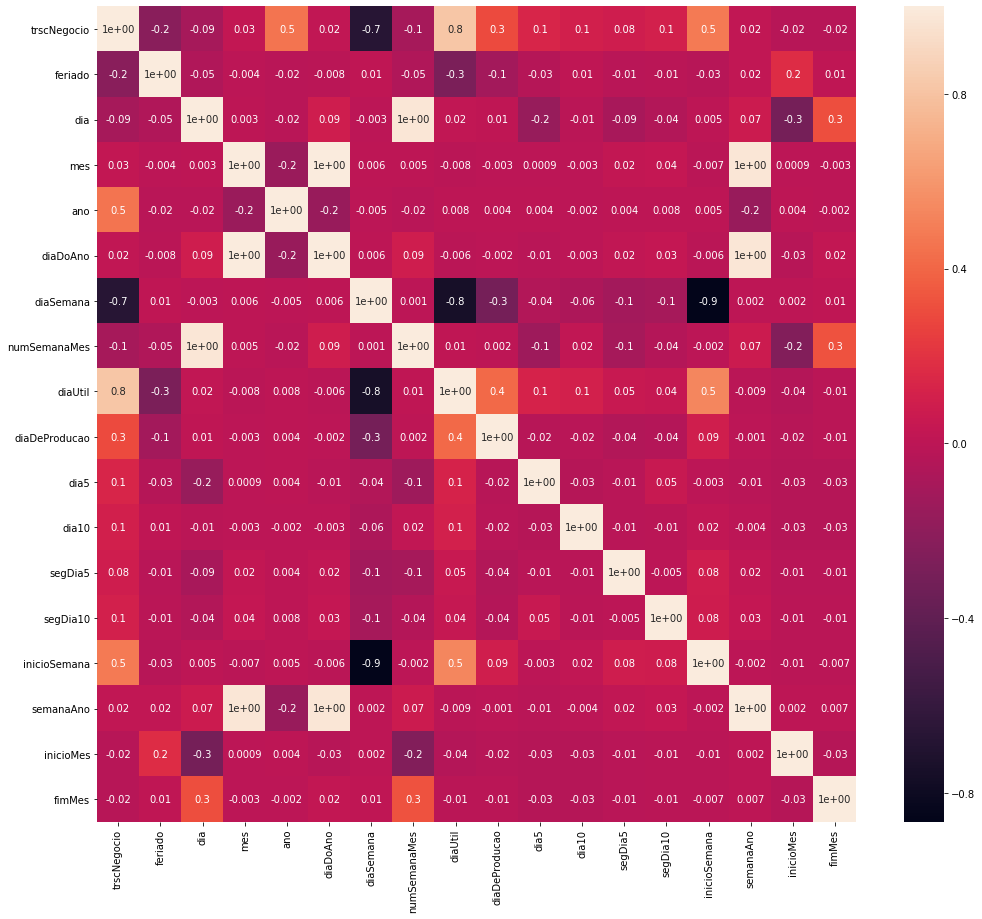

In [7]:
import seaborn as sns
plt.figure(figsize=(17,15))
sns.heatmap(dfDiario.corr(), annot = True, fmt = '.1')

In [20]:
x = dfDiario[['feriado', 'dia', 'mes', 'ano', 'diaDoAno', 'diaSemana', 'numSemanaMes', 'diaUtil', 'segDia5', 'segDia10', 'diaDeProducao', 'dia5', 'dia10', 'inicioSemana', 'semanaAno', 'inicioMes', 'fimMes']]
y = dfDiario['trscNegocio']
len(x), len(y)

(1349, 1349)

In [8]:
df = dfDiario.loc[dfDiario.data > '2016-12-31']
x = df[['feriado', 'dia', 'mes', 'ano', 'diaDoAno', 'diaSemana', 'numSemanaMes', 'diaUtil', 'segDia5', 'segDia10', 'diaDeProducao', 'dia5', 'dia10', 'inicioSemana', 'semanaAno']]
y = df['trscNegocio']
len(x), len(y)

(983, 983)

In [21]:
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.33, random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_treino), len(x_teste)))

Treinaremos com 903 elementos e testaremos com 446 elementos


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model = LinearRegression()
lr_model.fit(x_treino, y_treino)
print('R² = {}'.format(lr_model.score(x_treino, y_treino).round(3)))
y_previsto = lr_model.predict(x_teste)
print('R² = %s' % metrics.r2_score(y_teste, y_previsto).round(3))

R² = 0.898
R² = 0.899


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(x_treino, y_treino)
print('R² = {}'.format(lgb_model.score(x_treino, y_treino).round(3)))
y_previsto = lgb_model.predict(x_teste)
print('R² = %s' % metrics.r2_score(y_teste, y_previsto).round(3))

R² = 0.986
R² = 0.966


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost.sklearn import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(x_treino, y_treino)
print('R² = {}'.format(xgb_model.score(x_treino, y_treino).round(3)))
y_previsto = xgb_model.predict(x_teste)
print('R² = %s' % metrics.r2_score(y_teste, y_previsto).round(3))

[16:42:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² = 0.975
R² = 0.965


c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [25]:
lr_pred = lr_model.predict(x_teste)
lgb_pred = lgb_model.predict(x_teste)
xgb_pred = xgb_model.predict(x_teste)

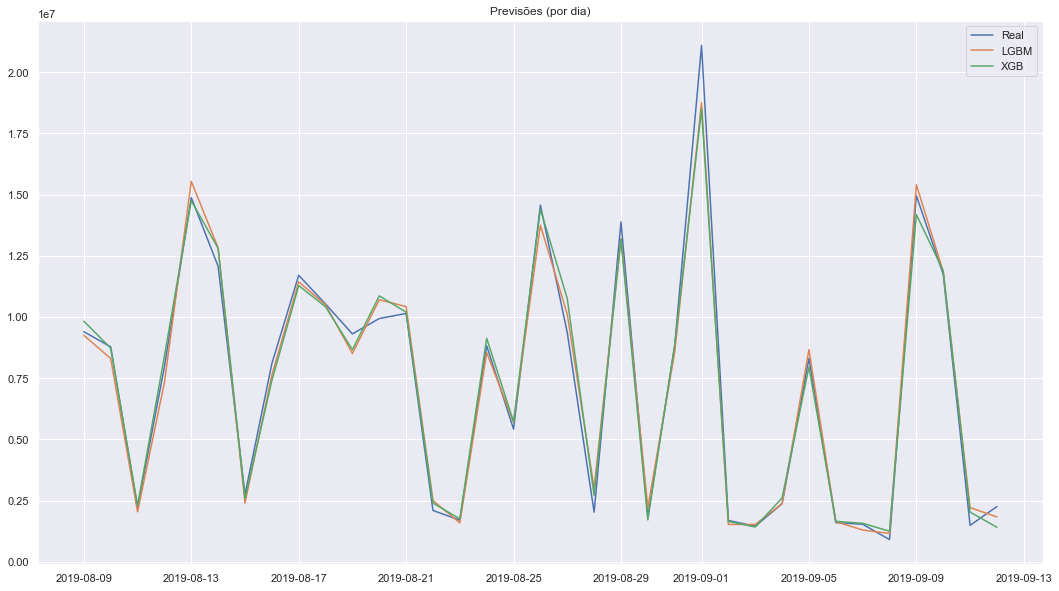

In [37]:
plt.figure(figsize=(18, 10))
#plt.plot(dados.data[-35:], dados.totalTrsc[-35:])
plt.plot(dfDiario.data[-35:], y_teste[-35:], label='Real')
#plt.plot(dfDiario.data[:-35], lr_pred[-35:], label='LinearR')
plt.plot(dfDiario.data[-35:], lgb_pred[-35:], label='LGBM')
plt.plot(dfDiario.data[-35:], xgb_pred[-35:], label='XGB')
plt.title('Previsões (por dia)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
feriado = [0,0,0,0,0,0,0,0,0,0,0]
dia = [4,5,6,7,8,9,10,11,12,13,14]
mes = [8,8,8,8,8,8,8,8,8,8,8]
ano = [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019]
diaDoAno = [216,217,218,219,220,221,222,223,224,225,226]
diaSemana = [6,0,1,2,3,4,5,6,0,1,2]
numSemanaMes = [2,2,2,2,2,2,2,3,3,3,3]
diaUtil = [0,1,1,1,1,1,0,0,1,1,1]
diaDeProducao = [0,0,1,0,1,0,0,0,0,1,0]
dia5 = [0,0,0,1,0,0,0,0,0,0,0]
dia10 = [0,0,0,0,0,0,0,0,0,0,10]
segDia5 = [0,1,0,0,0,0,0,0,0,0,0]
segDia10 = [0,0,0,0,0,0,0,0,0,0,0]
inicioSemana = [0,1,1,1,0,0,0,0,1,1,1]
semanaAno = [32,32,32,32,32,32,32,32,33,33,33]
inicioMes = [0,0,0,0,0,0,0,0,0,0,0]
fimMes = [0,0,0,0,0,0,0,0,0,0,0]

entrada = []
lr_predict = []
lgb_predict = []
for i in range(len(dia)):
    entrada.append([[feriado[i], dia[i], mes[i], ano[i], diaDoAno[i], diaSemana[i], numSemanaMes[i], diaUtil[i], segDia5[i], segDia10[i], diaDeProducao[i], dia5[i], dia10[i], inicioSemana[i], semanaAno[i], inicioMes[i], fimMes[i]]])
    #lr_predict.append(int(lr_model.predict(entrada[i])[0]))
    lgb_predict.append(int(lgb_model.predict(entrada[i])[0]))
    #print('Dia: {:02d} LinearRegression: {}'.format(dia[i], lr_predict[i]))
    print('Dia: {:02d} LGBRegression: {}'.format(dia[i], lgb_predict[i]))

Dia: 04 LGBRegression: 2580215
Dia: 05 LGBRegression: 18995361
Dia: 06 LGBRegression: 17206776
Dia: 07 LGBRegression: 17470028
Dia: 08 LGBRegression: 15718664
Dia: 09 LGBRegression: 16094569
Dia: 10 LGBRegression: 4397214
Dia: 11 LGBRegression: 2816374
Dia: 12 LGBRegression: 17864244
Dia: 13 LGBRegression: 15207587
Dia: 14 LGBRegression: 14852332


In [39]:
df = pd.DataFrame([4,5,6,7,8,9,10,11,12,13,14], columns=['dia'])
df['qtdReal'] = [2848202,19250210,17570843,17222544,15141644,15638620,5383979,2911167,20426469,15534590,14498285]
df['qtdPrev'] = lgb_predict
df

,dia,qtdReal,qtdPrev
0,4,2848202,2580215
1,5,19250210,18995361
2,6,17570843,17206776
3,7,17222544,17470028
4,8,15141644,15718664
5,9,15638620,16094569
6,10,5383979,4397214
7,11,2911167,2816374
8,12,20426469,17864244
9,13,15534590,15207587


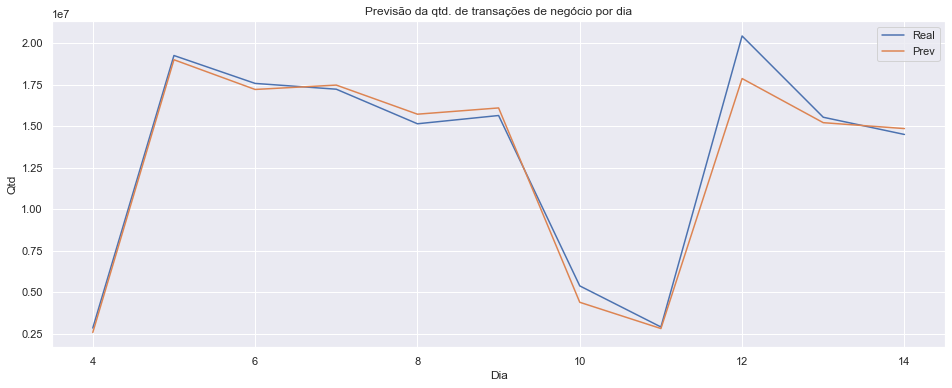

In [106]:
import seaborn as sns
sns.set(style='darkgrid')

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x='dia', y='qtdReal', data=df, label='Real')
ax = sns.lineplot(x='dia', y='qtdPrev', data=df, label='Prev')
ax.set_title('Previsão da qtd. de transações de negócio por dia')
ax.set_xlabel('Dia')
ax.set_ylabel('Qtd')
plt.legend()

ax = ax

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, datetime, timezone
from workalendar.america import Brazil
cal = Brazil()

dfMensal = pd.read_csv('./trscNegocioM.csv', sep=';')
dfMensal['data'] = pd.to_datetime(dfMensal['data'], format='%d/%m/%Y')
dfMensal['mes'] = (dfMensal['data'].dt.month)
dfMensal['ano'] = (dfMensal['data'].dt.year)
dfMensal['qtdDias'] = (dfMensal['data'].dt.day)
dfMensal['sMov'] = ((dfMensal['mes'] > 9) | (dfMensal['mes'] < 4) == True)
dfMensal['diasUteis19'] = 0
dfMensal['diasUteis20'] = 0
dfMensal['diasUteis21'] = 0
dfMensal['diasUteis22'] = 0
#dfMensal['anoBissexto'] = (dfMensal['data'].dt.is_leap_year)

dias = np.array(dfMensal['qtdDias'].tolist())
meses = np.array(dfMensal['mes'].tolist())
anos = np.array(dfMensal['ano'].tolist())

for i in range(len(dfMensal)):
    #print(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])))
    #if(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])) == 18):
        #dfMensal['diasUteis18'][i] = 1
    if(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])) == 19):
        dfMensal['diasUteis19'][i] = 1
    elif(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])) == 20):
        dfMensal['diasUteis20'][i] = 1
    elif(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])) == 21):
        dfMensal['diasUteis21'][i] = 1
    else:
        dfMensal['diasUteis22'][i] = 1
    #else:
        #dfMensal['diasUteis23'][i] = 1
        
#for i in range(len(dfMensal)):
    #print(dias[i])
#dfMensal.dtypes

dfMensal.head()

c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ramon.nascimento\appda

,data,totalMes,mes,ano,qtdDias,sMov,diasUteis19,diasUteis20,diasUteis21,diasUteis22
0,2014-06-30,87129294,6,2014,30,False,0,0,1,0
1,2014-07-31,96455689,7,2014,31,False,0,0,0,1
2,2014-08-31,92885400,8,2014,31,False,0,1,0,0
3,2014-09-30,98029722,9,2014,30,False,0,0,1,0
4,2014-10-31,102467266,10,2014,31,True,0,0,0,1


In [42]:
trocar = {
        True : 1,
        False : 0
    }
dfMensal.sMov = dfMensal.sMov.map(trocar)
#dfMensal.anoBissexto = dfMensal.anoBissexto.map(trocar)

In [43]:
dfMensal.corr().round(4)

,totalMes,mes,ano,qtdDias,sMov,diasUteis19,diasUteis20,diasUteis21,diasUteis22
totalMes,1.0000,-0.0712,0.9616,0.0761,-0.0647,0.1354,-0.2248,-0.0324,0.1389
mes,-0.0712,1.0000,-0.2524,0.2567,-0.0067,0.0649,0.0540,0.1387,-0.2439
ano,0.9616,-0.2524,1.0000,-0.0514,-0.0242,0.2159,-0.2101,-0.0956,0.1189
qtdDias,0.0761,0.2567,-0.0514,1.0000,-0.0913,-0.5091,-0.1125,0.1076,0.4326
sMov,-0.0647,-0.0067,-0.0242,-0.0913,1.0000,0.1475,0.0648,-0.0784,-0.1106
diasUteis19,0.1354,0.0649,0.2159,-0.5091,0.1475,1.0000,-0.2796,-0.2796,-0.2909
diasUteis20,-0.2248,0.0540,-0.2101,-0.1125,0.0648,-0.2796,1.0000,-0.3696,-0.3845
diasUteis21,-0.0324,0.1387,-0.0956,0.1076,-0.0784,-0.2796,-0.3696,1.0000,-0.3845
diasUteis22,0.1389,-0.2439,0.1189,0.4326,-0.1106,-0.2909,-0.3845,-0.3845,1.0000


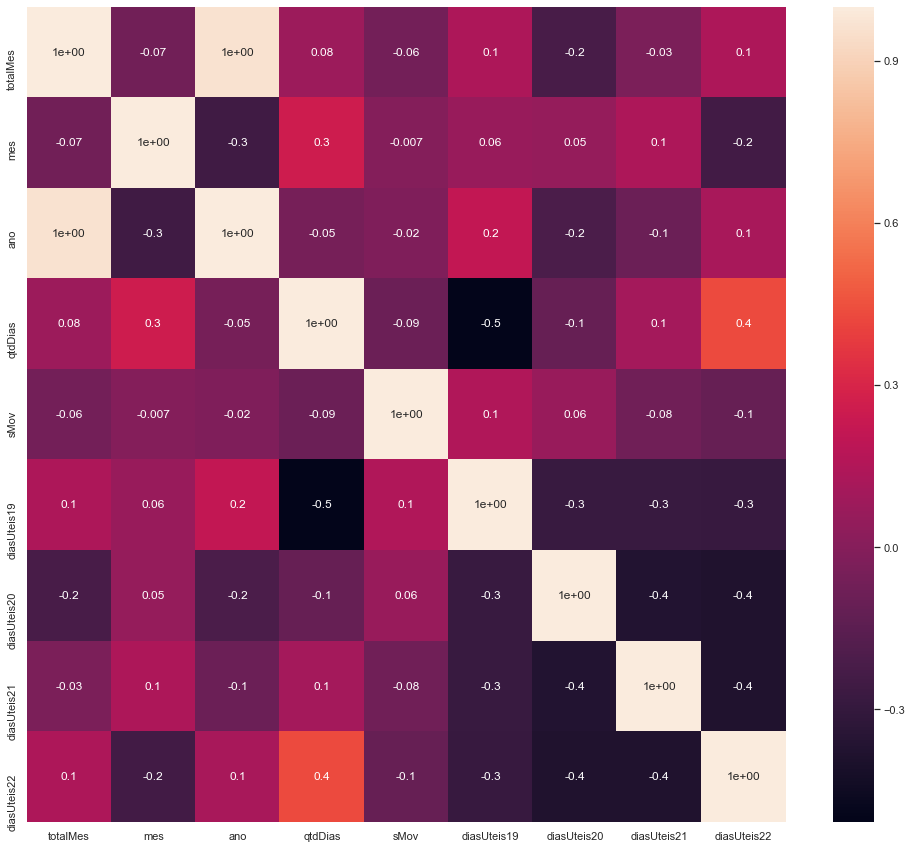

In [44]:
import seaborn as sns
plt.figure(figsize=(17,15))
sns.heatmap(dfMensal.corr(), annot = True, fmt = '.1')

In [90]:
df2 = dfMensal.loc[dfMensal.data > '2017-12-31']
x2 = df2[['mes', 'ano', 'qtdDias', 'sMov', 'diasUteis19', 'diasUteis20', 'diasUteis22']]
y2 = df2['totalMes']
len(x2), len(y2)

(20, 20)

In [91]:
x2 = dfMensal[['mes', 'ano', 'qtdDias', 'diasUteis19', 'diasUteis20', 'diasUteis22']]
y2 = dfMensal['totalMes']
len(x2), len(y2)

(63, 63)

In [92]:
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2, y2, test_size = 0.20, random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x2_treino), len(x2_teste)))

Treinaremos com 50 elementos e testaremos com 13 elementos


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model2 = LinearRegression()
lr_model2.fit(x2_treino, y2_treino)
print('R² = {}'.format(lr_model2.score(x2_treino, y2_treino).round(3)))
y2_previsto = lr_model2.predict(x2_teste)
print('R² = %s' % metrics.r2_score(y2_teste, y2_previsto).round(3))

R² = 0.97
R² = 0.953


In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor

lgb_model2 = LGBMRegressor()
lgb_model2.fit(x2_treino, y2_treino)
print('R² = {}'.format(lgb_model2.score(x2_treino, y2_treino).round(3)))
y2_previsto = lgb_model2.predict(x2_teste)
print('R² = %s' % metrics.r2_score(y2_teste, y2_previsto).round(3))

R² = 0.745
R² = 0.581


In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost.sklearn import XGBRegressor

xgb_model2 = XGBRegressor()
xgb_model2.fit(x2_treino, y2_treino)
print('R² = {}'.format(xgb_model2.score(x2_treino, y2_treino).round(3)))
y2_previsto = xgb_model2.predict(x2_teste)
print('R² = %s' % metrics.r2_score(y2_teste, y2_previsto).round(3))

[18:53:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² = 0.998
R² = 0.961


c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [96]:
lr_pred2 = lr_model2.predict(x2_teste)
lgb_pred2 = lgb_model2.predict(x2_teste)
xgb_pred2 = xgb_model2.predict(x2_teste)

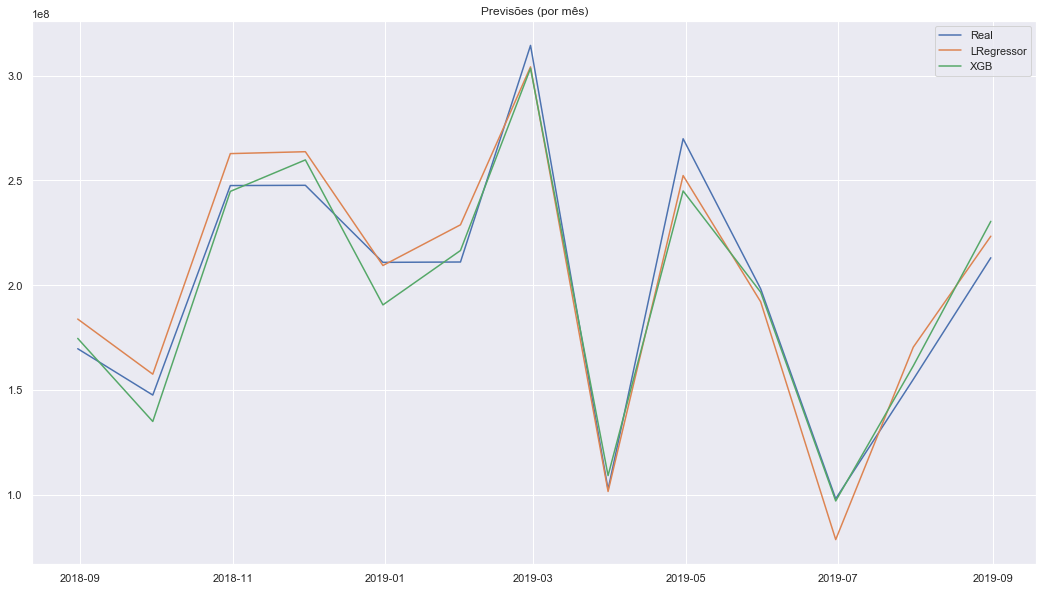

In [97]:
plt.figure(figsize=(18, 10))
#plt.plot(dados.data[-35:], dados.totalTrsc[-35:])
plt.plot(dfMensal.data[-13:], y2_teste[-13:], label='Real')
plt.plot(dfMensal.data[-13:], lr_pred2[-13:], label='LRegressor')
#plt.bar(dfMensal.data[-13:], lgb_pred2[-13:])
plt.plot(dfMensal.data[-13:], xgb_pred2[-13:], label='XGB')
plt.title('Previsões (por mês)')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
pMeses = [1,2,3,4,5,6,7,8,9,10,11,12]
pAnos = [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019]
pQtdDias = [31,28,31,30,31,30,31,31,30,31,30,31]
#pMovS = [1,1,1,0,0,0,0,0,0,1,1,1]
#anoBissexto = [0,0,0,0,0,0,0,0,0,0,0,0]
pDiasUteis19 = []
pDiasUteis20 = []
pDiasUteis21 = []
pDiasUteis22 = []

for i in range(len(pMeses)):
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 19):
        pDiasUteis19.append(1)
    else:
        pDiasUteis19.append(0)
for i in range(len(pMeses)):
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 20):
        pDiasUteis20.append(1)
    else:
        pDiasUteis20.append(0)
for i in range(len(pMeses)):       
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 21):
        pDiasUteis21.append(1)
    else:
        pDiasUteis21.append(0)
for i in range(len(pMeses)):   
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 22):
        pDiasUteis22.append(1)
    else:
        pDiasUteis22.append(0)
    
# print(pDiasUteis19)
# print(pDiasUteis20)
# print(pDiasUteis21)
# print(pDiasUteis22)

entrada2 = []
lr_predict2 = []
xgb_predict2 = []
for i in range(len(pMeses)):
    entrada2.append([[pMeses[i], pAnos[i], pQtdDias[i], pDiasUteis19[i], pDiasUteis20[i], pDiasUteis22[i]]])
    lr_predict2.append(int(lr_model2.predict(entrada2[i])[0]))
    #xgb_predict2.append(int(xgb_model2.predict(entrada2[i])[0]))
    print('Mes: {:02d} LRegressor: {}'.format(pMeses[i], lr_predict2[i]))
    #print('Mes: {:02d} XGBRegressor: {}'.format(pMeses[i], xgb_predict2[i]))

Mes: 01 LRegressor: 304180348
Mes: 02 LRegressor: 279711315
Mes: 03 LRegressor: 308122500
Mes: 04 LRegressor: 315565294
Mes: 05 LRegressor: 322078317
Mes: 06 LRegressor: 317978088
Mes: 07 LRegressor: 331027302
Mes: 08 LRegressor: 337031152
Mes: 09 LRegressor: 337937755
Mes: 10 LRegressor: 344450779
Mes: 11 LRegressor: 327117525
Mes: 12 LRegressor: 354929122


In [100]:
df2 = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12], columns=['mes'])
df2['qtdReal'] = [314426934,293463475,304668636,334002532,366071433,328974948,319003088,380532993,0,0,0,0]
df2['qtdPrev'] = lr_predict2
df2

,mes,qtdReal,qtdPrev
0,1,314426934,304180348
1,2,293463475,279711315
2,3,304668636,308122500
3,4,334002532,315565294
4,5,366071433,322078317
5,6,328974948,317978088
6,7,319003088,331027302
7,8,380532993,337031152
8,9,0,337937755
9,10,0,344450779


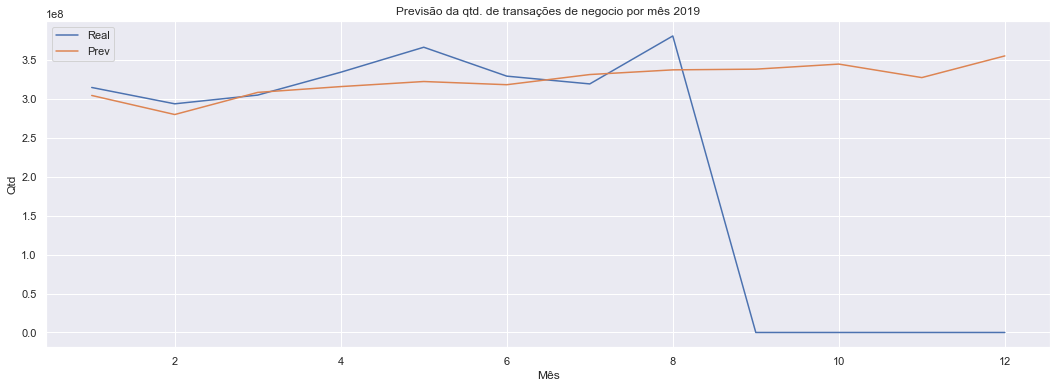

In [101]:
#import seaborn as sns
sns.set(style='darkgrid')

plt.figure(figsize=(18, 6))
ax = sns.lineplot(x='mes', y='qtdReal', data=df2, label='Real')
ax = sns.lineplot(x='mes', y='qtdPrev', data=df2, label='Prev')
ax.set_title('Previsão da qtd. de transações de negocio por mês 2019')
ax.set_xlabel('Mês')
ax.set_ylabel('Qtd')
ax.legend()

ax = ax

In [87]:
pMeses = [1,2,3,4,5,6,7,8,9,10,11,12]
pAnos = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
pQtdDias = [31,29,31,30,31,30,31,31,30,31,30,31]
#pMovS = [1,1,1,0,0,0,0,0,0,1,1,1]
anoBissexto = [1,1,1,1,1,1,1,1,1,1,1,1,1]
pDiasUteis19 = []
pDiasUteis20 = []
pDiasUteis21 = []
pDiasUteis22 = []

for i in range(len(pMeses)):
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 19):
        pDiasUteis19.append(1)
    else:
        pDiasUteis19.append(0)
for i in range(len(pMeses)):
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 20):
        pDiasUteis20.append(1)
    else:
        pDiasUteis20.append(0)
for i in range(len(pMeses)):       
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 21):
        pDiasUteis21.append(1)
    else:
        pDiasUteis21.append(0)
for i in range(len(pMeses)):   
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 22):
        pDiasUteis22.append(1)
    else:
        pDiasUteis22.append(0)
    
# print(pDiasUteis19)
# print(pDiasUteis20)
# print(pDiasUteis21)
# print(pDiasUteis22)

entrada2 = []
lr_predict2 = []
xgb_predict2 = []
for i in range(len(pMeses)):
    entrada2.append([[pMeses[i], pAnos[i], pQtdDias[i], pDiasUteis19[i], pDiasUteis20[i], pDiasUteis21[i], pDiasUteis22[i]]])
    lr_predict2.append(int(lr_model2.predict(entrada2[i])[0]))
    #xgb_predict2.append(int(xgb_model2.predict(entrada2[i])[0]))
    print('Mes: {:02d} LRegressor: {}'.format(pMeses[i], lr_predict2[i]))
    #print('Mes: {:02d} XGBRegressor: {}'.format(pMeses[i], xgb_predict2[i]))

Mes: 01 LRegressor: 356061332
Mes: 02 LRegressor: 348393213
Mes: 03 LRegressor: 365010317
Mes: 04 LRegressor: 360910087
Mes: 05 LRegressor: 368952469
Mes: 06 LRegressor: 376395263
Mes: 07 LRegressor: 382908286
Mes: 08 LRegressor: 388912137
Mes: 09 LRegressor: 383282549
Mes: 10 LRegressor: 391324931
Mes: 11 LRegressor: 392231534
Mes: 12 LRegressor: 406810106


In [88]:
df20 = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12], columns=['mes'])
df20['qtdReal'] = [0,0,0,0,0,0,0,0,0,0,0,0]
df20['qtdPrev'] = lr_predict2
df20

,mes,qtdReal,qtdPrev
0,1,0,356061332
1,2,0,348393213
2,3,0,365010317
3,4,0,360910087
4,5,0,368952469
5,6,0,376395263
6,7,0,382908286
7,8,0,388912137
8,9,0,383282549
9,10,0,391324931


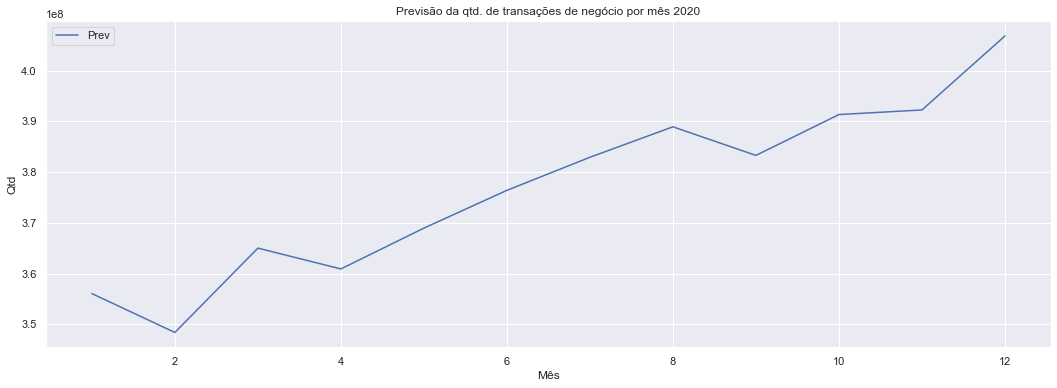

In [89]:
#import seaborn as sns
sns.set(style='darkgrid')

plt.figure(figsize=(18, 6))
#ax = sns.lineplot(x='mes', y='qtdReal', data=df2, label='Real')
ax = sns.lineplot(x='mes', y='qtdPrev', data=df20, label='Prev')
ax.set_title('Previsão da qtd. de transações de negócio por mês 2020')
ax.set_xlabel('Mês')
ax.set_ylabel('Qtd')
ax.legend()

ax = ax